In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#data -> https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [3]:
df = pd.read_csv("car_evaluation.csv")

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df["vhigh"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
df["vhigh.1"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [8]:
df["small"].unique()

array(['small', 'med', 'big'], dtype=object)

In [9]:
new_columns = ["buying price", "maintenance cost","number of doors", "number of persons", "lug_boot","safety", "class"]
df.columns = new_columns

In [10]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [11]:
for col in df.columns:
    print(df[col].value_counts())

buying price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintenance cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
number of doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
number of persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
df["number of doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [14]:
df["number of doors"] = df["number of doors"].replace('5more','5')
df["number of doors"] = df["number of doors"].astype(int)

In [15]:
df["number of persons"] = df["number of persons"].replace("more","5")
df["number of persons"] = df["number of persons"].astype(int)

In [16]:
df["buying price"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [17]:
df["maintenance cost"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
ordinal = OrdinalEncoder(categories=[['low','med','high','vhigh']])

In [20]:
df["buying price"] = ordinal.fit_transform(df[["buying price"]])
df["maintenance cost"] = ordinal.fit_transform(df[["maintenance cost"]])

In [21]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,class
0,3.0,3.0,2,2,small,med,unacc
1,3.0,3.0,2,2,small,high,unacc
2,3.0,3.0,2,2,med,low,unacc
3,3.0,3.0,2,2,med,med,unacc
4,3.0,3.0,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,0.0,0.0,5,5,med,med,good
1723,0.0,0.0,5,5,med,high,vgood
1724,0.0,0.0,5,5,big,low,unacc
1725,0.0,0.0,5,5,big,med,good


In [22]:
df["maintenance cost"].unique()

array([3., 2., 1., 0.])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buying price       1727 non-null   float64
 1   maintenance cost   1727 non-null   float64
 2   number of doors    1727 non-null   int64  
 3   number of persons  1727 non-null   int64  
 4   lug_boot           1727 non-null   object 
 5   safety             1727 non-null   object 
 6   class              1727 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 94.6+ KB


In [24]:
df["lug_boot"].unique()

array(['small', 'med', 'big'], dtype=object)

In [25]:
df["safety"].unique()

array(['med', 'high', 'low'], dtype=object)

In [26]:
ordinal_lugboot = OrdinalEncoder(categories=[['small','med','big']])
ordinal_safety = OrdinalEncoder(categories=[['low','med','high']])

In [27]:
df["lug_boot"] = ordinal_lugboot.fit_transform(df[["lug_boot"]])
df["safety"] = ordinal_safety.fit_transform(df[["safety"]])

from sklearn.compose import ColumnTransformer

"""
ordinal_encoder = OrdinalEncoder(categories = [
    ["low", "med", "high", "vhigh"], #buying
    ["low", "med", "high", "vhigh"], #maint
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety
])

preprocessor = ColumnTransformer( transformers= [
    ('transformation_name_doesnt_matter', ordinal_encoder, categorical_cols),
], remainder="passthrough")
"""

'\nordinal_encoder = OrdinalEncoder(categories = [\n    ["low", "med", "high", "vhigh"], #buying\n    ["low", "med", "high", "vhigh"], #maint\n    ["small", "med", "big"], #lug_boot\n    ["low", "med", "high"] #safety\n])\n\npreprocessor = ColumnTransformer( transformers= [\n    (\'transformation_name_doesnt_matter\', ordinal_encoder, categorical_cols),\n], remainder="passthrough")\n'

In [28]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,class
0,3.0,3.0,2,2,0.0,1.0,unacc
1,3.0,3.0,2,2,0.0,2.0,unacc
2,3.0,3.0,2,2,1.0,0.0,unacc
3,3.0,3.0,2,2,1.0,1.0,unacc
4,3.0,3.0,2,2,1.0,2.0,unacc
...,...,...,...,...,...,...,...
1722,0.0,0.0,5,5,1.0,1.0,good
1723,0.0,0.0,5,5,1.0,2.0,vgood
1724,0.0,0.0,5,5,2.0,0.0,unacc
1725,0.0,0.0,5,5,2.0,1.0,good


In [29]:
df["class"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buying price       1727 non-null   float64
 1   maintenance cost   1727 non-null   float64
 2   number of doors    1727 non-null   int64  
 3   number of persons  1727 non-null   int64  
 4   lug_boot           1727 non-null   float64
 5   safety             1727 non-null   float64
 6   class              1727 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 94.6+ KB


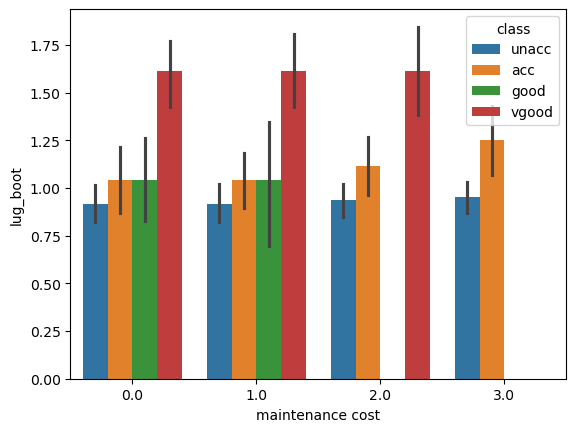

In [31]:
sns.barplot(x="maintenance cost", y="lug_boot", hue="class", data=df)
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buying price       1727 non-null   float64
 1   maintenance cost   1727 non-null   float64
 2   number of doors    1727 non-null   int64  
 3   number of persons  1727 non-null   int64  
 4   lug_boot           1727 non-null   float64
 5   safety             1727 non-null   float64
 6   class              1727 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 94.6+ KB


In [35]:
df["class"].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [36]:
df["class"].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X=df.drop(columns="class",axis=1)
y=df["class"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=42)

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [130]:
tree_model = DecisionTreeClassifier(criterion='entropy', splitter="best",max_depth=None)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

Accuracy Score:  0.9561621174524401
              precision    recall  f1-score   support

         acc       0.92      0.92      0.92       271
        good       0.72      0.94      0.82        36
       unacc       0.99      0.97      0.98       864
       vgood       0.82      0.84      0.83        38

    accuracy                           0.96      1209
   macro avg       0.86      0.92      0.89      1209
weighted avg       0.96      0.96      0.96      1209

[[248   7  11   5]
 [  0  34   0   2]
 [ 19   3 842   0]
 [  3   3   0  32]]


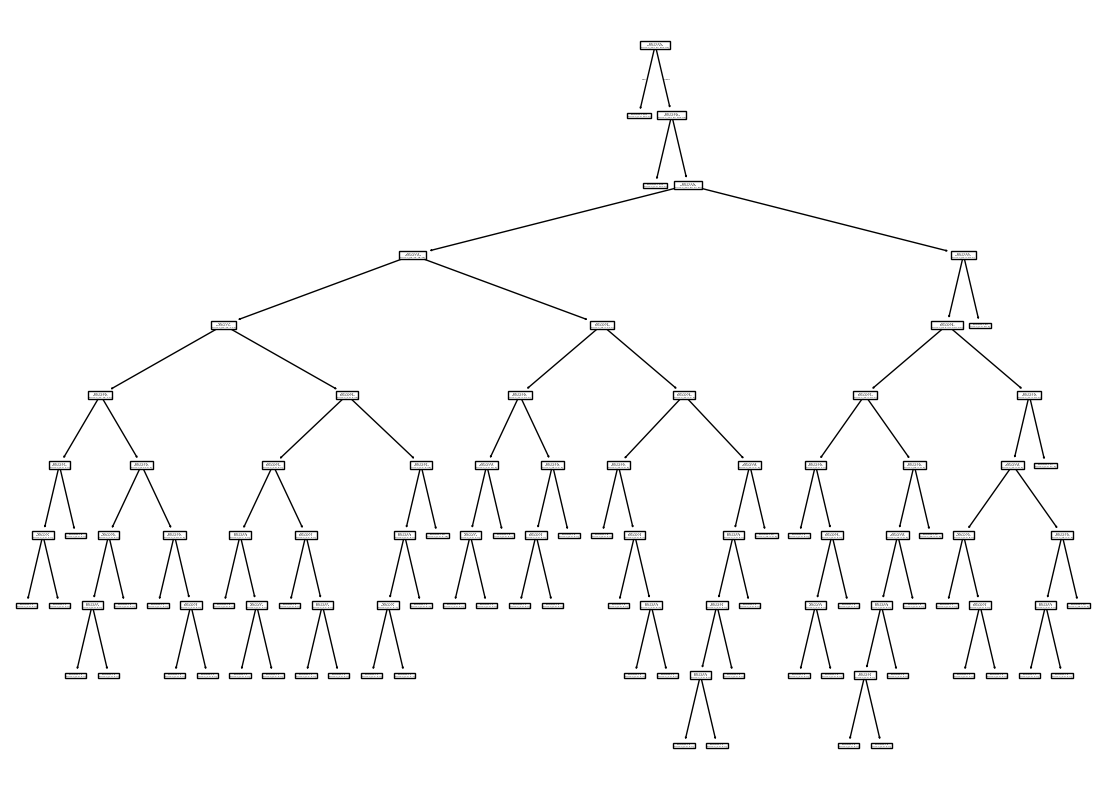

In [89]:
plt.figure(figsize=(14,10))

from sklearn import tree

tree.plot_tree(tree_model.fit(X_train, y_train))
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV

In [133]:
params = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best","random"],
    "max_depth" : [8,9,10,None],
    "max_features" : ["sqrt", "log2", None]
}

In [134]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=3 ,scoring="accuracy")

In [176]:
grid.fit(X_train,y_train)
y_pred = grid.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

Accuracy Score:  0.9545078577336642
              precision    recall  f1-score   support

         acc       0.91      0.90      0.91       271
        good       0.87      0.85      0.86        48
       unacc       0.98      0.98      0.98       852
       vgood       0.87      0.89      0.88        38

    accuracy                           0.95      1209
   macro avg       0.91      0.91      0.91      1209
weighted avg       0.95      0.95      0.95      1209

[[245   3  18   5]
 [  6  41   1   0]
 [ 18   0 834   0]
 [  1   3   0  34]]


In [149]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'splitter': 'random'}